# Data cleaning

### Loading data

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

### Changing to multi index with time and ID
We want to reformat the data such that we have a number of observations for each patient, with each observation consisting of some time period e.g one week. Each observation will have a measurement for each attribute (e.g., Avg time spent on weather app over period) with the dependent variable as the average mood over the period. 

In [57]:
#Import
data = pd.read_csv('dataset_mood_smartphone.csv')
print(len(data))

# Clea invalid responses
data = data.loc[(((data.value >= 1) & (data.value <= 10))|(data.variable != 'mood'))]
print(len(data))
data = data.loc[(((data.value >= -2) & (data.value <= 2))|(data.variable != 'circumplex.arousal'))]
print(len(data))
data = data.loc[(((data.value >= -2) & (data.value <= 2))|(data.variable != 'circumplex.valence'))]
print(len(data))
data = data.loc[(((data.value >= 0) & (data.value <= 1))|(data.variable != 'activity'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'screen'))]
print(len(data))
data = data.loc[(((data.value == 0) | (data.value == 1))|(data.variable != 'call'))]
print(len(data))
data = data.loc[(((data.value == 0) | (data.value == 1))|(data.variable != 'sms'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.communication'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.entertainment'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.finance'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.game'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.office'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.other'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.social'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.travel'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.unknown'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.utilities'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.weather'))]
print(len(data))

376912
376912
376866
376710
376710
376710
376710
376710
376710
376709
376709
376709
376709
376709
376709
376709
376709
376709
376709


In [58]:
#Convert time column to date time format
data['time']= pd.to_datetime(data['time']) 
data = data.set_index(['id', 'time'])
data_formated = pd.pivot_table(data, index=['id', 'time'], columns='variable', values='value')

### Summing rows for each 3 hours.  

How are we classifying a day?  I would classify the start of the day as when the person wakes up.  Therefor, the average of the day would be fine, but we would need to do something about the overnight times....  Maybe by classifying them as whole days even though we only take 3 hour chunks, we can add a column for not only the day of the week but also for hours of sleep, and if it was uninterupted?  This could be done by checking when the last phone usuage is between the hours of 10-3 with at least a 3 hour gap between?  to find if it was uninterupted check to see if past this time and before the high use time again?

Alternativly commbine the two into a last used and first used for each day? and we can add a statement that if the time is lesss than 5 hours that sleep wasnt restful?



In [59]:
data_formated = data_formated.astype(float)
data3H = data_formated.groupby([pd.Grouper(level='id'), pd.Grouper(freq='3H', level='time') 
                             ]).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})

data3H

appCat.communication  appCat.entertainment  \
id      time                                                              
AS14.01 2014-02-17 12:00:00                 0.000                 0.000   
        2014-02-17 18:00:00                 0.000                 0.000   
        2014-02-18 09:00:00                 0.000                 0.000   
        2014-02-19 12:00:00                 0.000                 0.000   
        2014-02-19 15:00:00                 0.000                 0.000   
        2014-02-19 18:00:00                 0.000                 0.000   
        2014-02-19 21:00:00                 0.000                 0.000   
        2014-02-20 09:00:00                 0.000                 0.000   
        2014-02-20 12:00:00                 0.000                 0.000   
        2014-02-21 15:00:00                 0.000                 0.000   
        2014-02-22 15:00:00                 0.000                 0.000   
        2014-02-22 18:00:00                 0.000                 0.000   
        2014-02-22 21:00:00                 0.000                 0.000   
        2014-02-25 09:00:00                 0.000                 0.000   
        2014-02-25 12:00:00                 0.000                 0.000   
        2014-02-26 12:00:00                 0.000                 0.000   
        2014-02-26 15:00:00                 0.000                 0.000   
        2014-02-26 18:00:00                 0.000                 0.000   
        2014-02-26 21:00:00                 0.000                 0.000   
        2014-02-27 09:00:00                 0.000                 0.000   
        2014-02-27 12:00:00                 0.000                 0.000   
        2014-02-27 15:00:00                 0.000                 0.000   
        2014-02-28 18:00:00                 0.000                 0.000   
        2014-02-28 21:00:00                 0.000                 0.000   
        2014-03-01 09:00:00                 0.000                 0.000   
        2014-03-03 18:00:00                 0.000                 0.000   
        2014-03-05 21:00:00                 0.000                 0.000   
        2014-03-06 18:00:00                 0.000                 0.000   
        2014-03-07 12:00:00                 0.000                 0.000   
        2014-03-07 15:00:00                 0.000                 0.000   
...                                           ...                   ...   
AS14.33 2014-05-27 09:00:00               813.081                 0.000   
        2014-05-27 12:00:00                27.093                 0.000   
        2014-05-27 15:00:00               243.493                 0.000   
        2014-05-27 18:00:00                92.525                 0.000   
        2014-05-27 21:00:00               409.440               124.694   
        2014-05-28 00:00:00                 0.000                 0.000   
        2014-05-28 03:00:00                 0.000                 0.000   
        2014-05-28 06:00:00                 0.000                 0.000   
        2014-05-28 09:00:00               373.485               182.111   
        2014-05-28 12:00:00               499.250               225.138   
        2014-05-28 15:00:00               268.393                10.040   
        2014-05-28 18:00:00               422.122                78.483   
        2014-05-28 21:00:00               373.165               118.934   
        2014-05-29 00:00:00                18.070                 0.000   
        2014-05-29 03:00:00                 0.000                 0.000   
        2014-05-29 06:00:00                 0.000                 0.000   
        2014-05-29 09:00:00               236.993               131.720   
        2014-05-29 12:00:00                87.516                 0.000   
        2014-05-29 15:00:00                92.526                 5.018   
        2014-05-29 18:00:00                 0.000                 0.000   
        2014-05-29 21:00:00                 0.000     

In [96]:
data1D =  data_formated.groupby([pd.Grouper(level='id'), pd.Grouper(freq='1D', level='time') 
                             ]).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})

mood_daily = data1D['mood']
mood_only = pd.DataFrame(mood_daily.dropna())

In [115]:
mood_only.loc[('AS14.03')]

,mood
time,
2014-03-21,9.000000
2014-03-22,7.800000
2014-03-23,8.200000
2014-03-24,7.800000
2014-03-25,7.800000
2014-03-26,8.250000
2014-03-27,7.750000
2014-03-28,8.000000
2014-03-29,8.600000


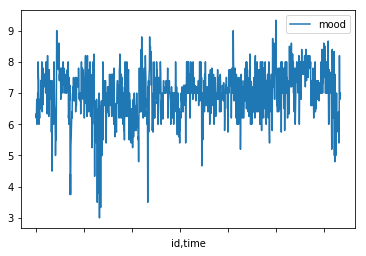

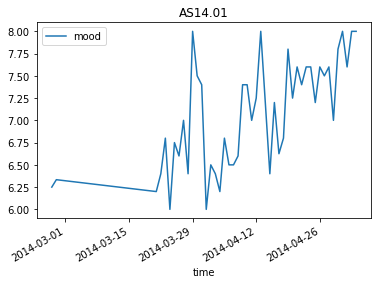

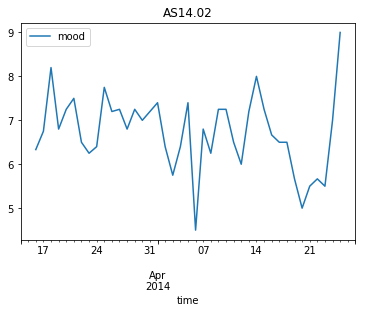

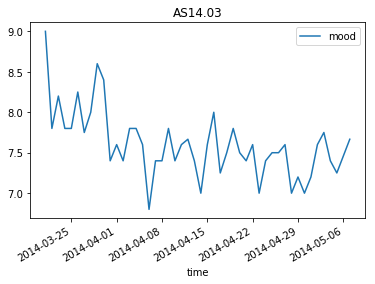

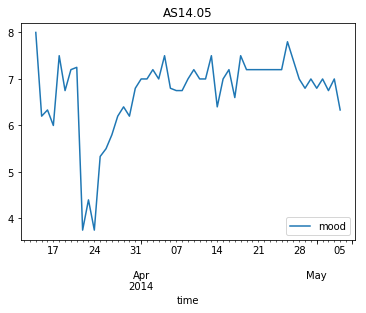

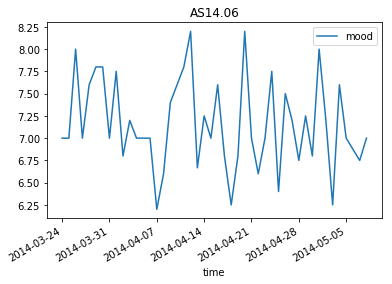

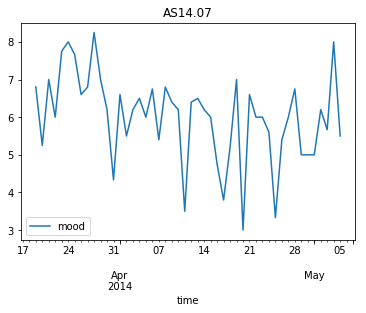

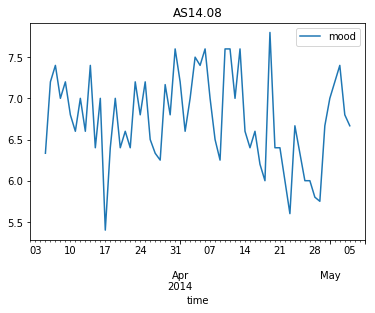

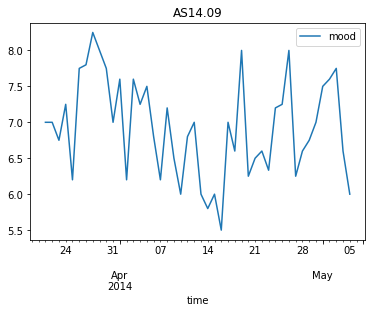

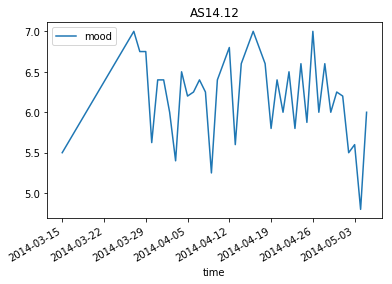

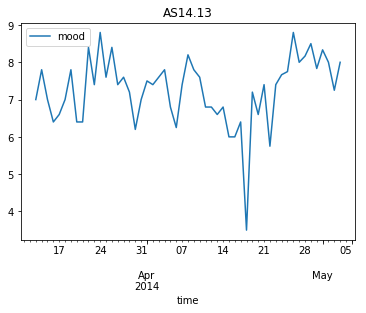

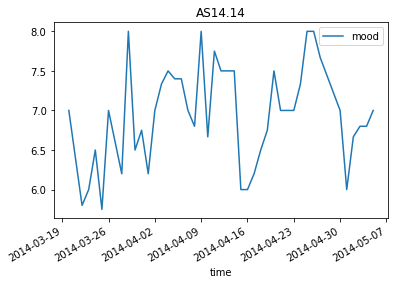

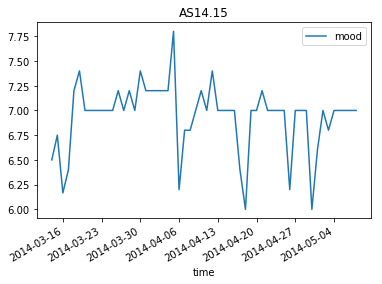

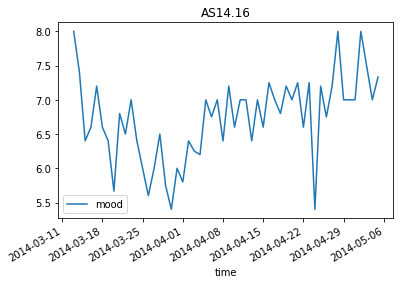

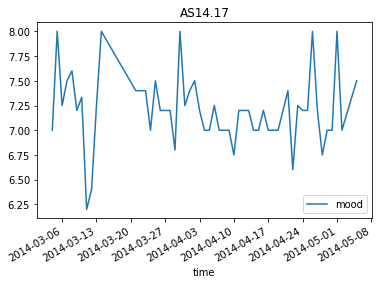

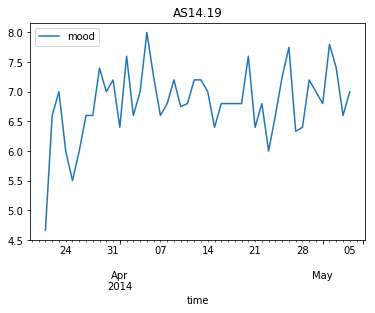

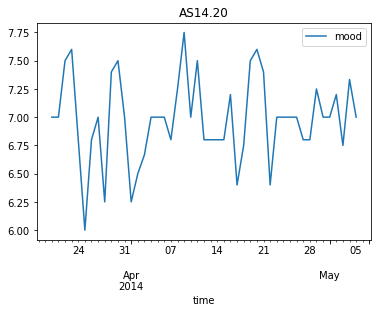

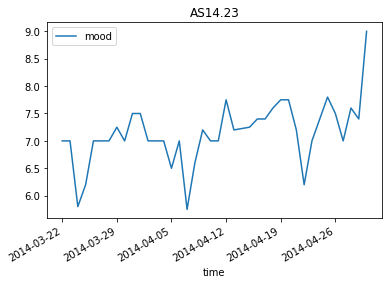

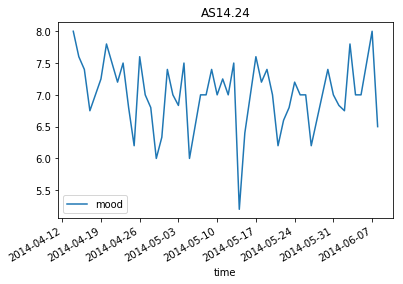

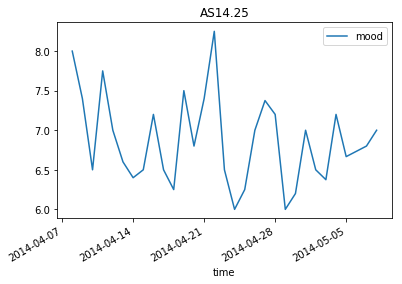

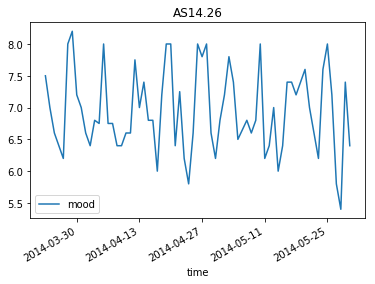

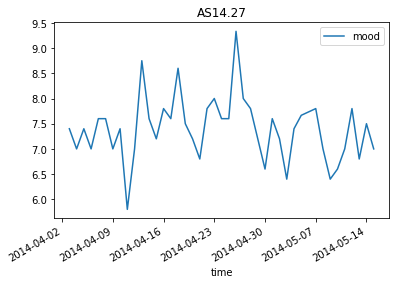

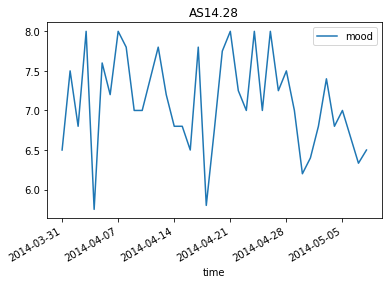

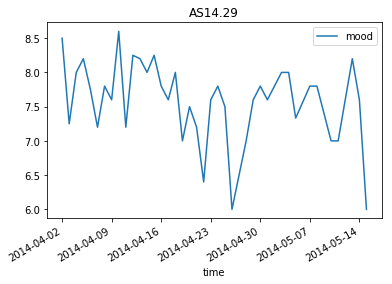

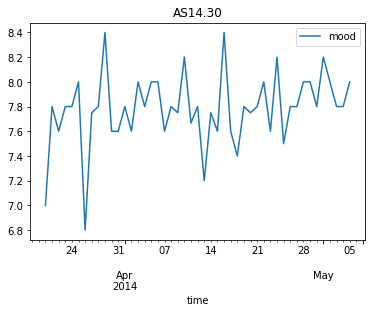

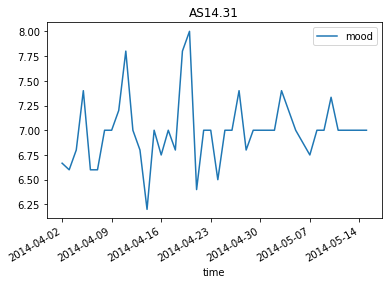

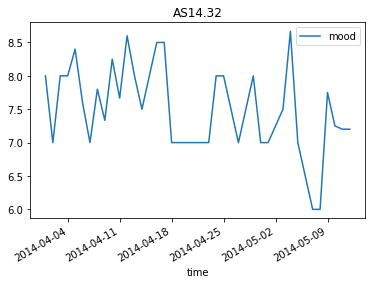

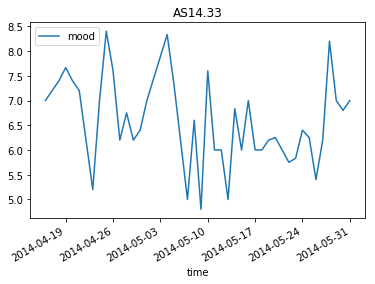

In [114]:
mood_only.plot.line()

for index in mood_only.index.levels[0].tolist():
    mood_only.loc[(index)].plot.line()
    plt.title(index)
    
#mood_only.loc[(['AS14.01']),:].plot.line()

In [68]:
#Make copy of data
data3 = copy.deepcopy(data2)

#Setup new frame
df = pd.DataFrame(columns=data3.columns)

df.insert(0,'date', "")
df.insert(0,'id', "")
df_lost = copy.deepcopy(df)

prev_id = data3.index[0][0]
i_prev = 0
ave_list = ['circumplex.arousal', 'mood', 'circumplex.valence']

tmp = []
for i in range(0, len(data3)):
    #print(i)
    if data3.index[i][0] != prev_id or data3.index[i_prev][1] != data3.index[i][1]:
        for k in range(i_prev, i):
            tmp.append(data3.index[i_prev][0])
            tmp.append(data3.index[k][1])
            for j in range(0, len(data3.columns)):
                tmp.append(data3.iloc[k,j])
            #print(len(tmp))
            df_lost.loc[len(df_lost)] = tmp
            tmp = []
        i_prev = i
        prev_id = data3.index[i][0]
    if not pd.isnull(data3['mood'].iloc[i]):
        tmp.append(data3.index[i_prev][0])
        tmp.append(data3.index[i][1])
        for j in range(0, len(data3.columns)):
            if any(data3.columns[j] in s for s in ave_list):
                tmp.append(data3.iloc[i_prev:i+1,j].mean())
            else:
                tmp.append(data3.iloc[i_prev:i+1,j].sum())
        df.loc[len(df)] = tmp
        tmp = []
        i_prev = i+1
print("done")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067


3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724


5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383


6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027


8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715


10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
1031

11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
11650
11651
11652
11653
11654
11655
11656
11657
11658
11659
11660
11661
11662
11663
11664
11665
11666
11667
11668
11669
11670
11671
11672
11673
11674
11675
11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
11696
11697
11698
11699
11700
11701
11702
11703
11704
11705
11706
11707
11708
11709
11710
1171

12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
13042
13043
13044
13045
13046
13047
13048
13049
13050
13051
13052
13053
13054
13055
13056
13057
13058
13059
13060
13061
13062
13063
13064
13065
13066
13067
13068
13069
13070
13071
13072
13073
13074
13075
13076
13077
13078
13079
13080
13081
13082
13083
13084
13085
13086
13087
13088
13089
13090
13091
13092
13093
13094
13095
13096
13097
13098
13099
13100
13101
13102
13103
13104
13105
13106
1310

14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
14404
14405
14406
14407
14408
14409
14410
14411
14412
14413
14414
14415
14416
14417
14418
14419
14420
14421
14422
14423
14424
14425
14426
14427
14428
14429
14430
14431
14432
14433
14434
14435
14436
14437
14438
14439
14440
14441
14442
14443
14444
14445
14446
14447
14448
14449
14450
14451
14452
14453
14454
14455
14456
14457
14458
14459
14460
14461
14462
14463
14464
14465
14466
14467
14468
14469
14470
14471
14472
14473
14474
14475
14476
14477
14478
14479
14480
14481
14482
14483
14484
14485
14486
1448

15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
15793
15794
15795
15796
15797
15798
15799
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
15818
15819
15820
15821
15822
15823
15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
15845
15846
15847
15848
15849
15850
15851
15852
1585

17077
17078
17079
17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
17107
17108
17109
17110
17111
17112
17113
17114
17115
17116
17117
17118
17119
17120
17121
17122
17123
17124
17125
17126
17127
17128
17129
17130
17131
17132
17133
17134
17135
17136
17137
17138
17139
17140
17141
17142
17143
17144
17145
17146
17147
17148
17149
17150
17151
17152
17153
17154
17155
17156
17157
17158
17159
17160
17161
17162
17163
17164
17165
17166
17167
17168
17169
17170
17171
17172
17173
17174
17175
17176
17177
17178
17179
17180
17181
17182
17183
17184
17185
17186
17187
17188
17189
17190
17191
17192
17193
17194
17195
17196
17197
17198
17199
17200
17201
17202
17203
17204
17205
17206
17207
17208
17209
17210
17211
17212
17213
17214
17215
17216
17217
17218
17219
17220
17221
17222
17223
17224
17225
17226
17227
17228
17229
17230
17231
17232
17233
17234
17235
17236
17237
17238
17239
17240
17241
17242
1724

18492
18493
18494
18495
18496
18497
18498
18499
18500
18501
18502
18503
18504
18505
18506
18507
18508
18509
18510
18511
18512
18513
18514
18515
18516
18517
18518
18519
18520
18521
18522
18523
18524
18525
18526
18527
18528
18529
18530
18531
18532
18533
18534
18535
18536
18537
18538
18539
18540
18541
18542
18543
18544
18545
18546
18547
18548
18549
18550
18551
18552
18553
18554
18555
18556
18557
18558
18559
18560
18561
18562
18563
18564
18565
18566
18567
18568
18569
18570
18571
18572
18573
18574
18575
18576
18577
18578
18579
18580
18581
18582
18583
18584
18585
18586
18587
18588
18589
18590
18591
18592
18593
18594
18595
18596
18597
18598
18599
18600
18601
18602
18603
18604
18605
18606
18607
18608
18609
18610
18611
18612
18613
18614
18615
18616
18617
18618
18619
18620
18621
18622
18623
18624
18625
18626
18627
18628
18629
18630
18631
18632
18633
18634
18635
18636
18637
18638
18639
18640
18641
18642
18643
18644
18645
18646
18647
18648
18649
18650
18651
18652
18653
18654
18655
18656
18657
1865

19885
19886
19887
19888
19889
19890
19891
19892
19893
19894
19895
19896
19897
19898
19899
19900
19901
19902
19903
19904
19905
19906
19907
19908
19909
19910
19911
19912
19913
19914
19915
19916
19917
19918
19919
19920
19921
19922
19923
19924
19925
19926
19927
19928
19929
19930
19931
19932
19933
19934
19935
19936
19937
19938
19939
19940
19941
19942
19943
19944
19945
19946
19947
19948
19949
19950
19951
19952
19953
19954
19955
19956
19957
19958
19959
19960
19961
19962
19963
19964
19965
19966
19967
19968
19969
19970
19971
19972
19973
19974
19975
19976
19977
19978
19979
19980
19981
19982
19983
19984
19985
19986
19987
19988
19989
19990
19991
19992
19993
19994
19995
19996
19997
19998
19999
20000
20001
20002
20003
20004
20005
20006
20007
20008
20009
20010
20011
20012
20013
20014
20015
20016
20017
20018
20019
20020
20021
20022
20023
20024
20025
20026
20027
20028
20029
20030
20031
20032
20033
20034
20035
20036
20037
20038
20039
20040
20041
20042
20043
20044
20045
20046
20047
20048
20049
20050
2005

21290
21291
21292
21293
21294
21295
21296
21297
21298
21299
21300
21301
21302
21303
21304
21305
21306
21307
21308
21309
21310
21311
21312
21313
21314
21315
21316
21317
21318
21319
21320
21321
21322
21323
21324
21325
21326
21327
21328
21329
21330
21331
21332
21333
21334
21335
21336
21337
21338
21339
21340
21341
21342
21343
21344
21345
21346
21347
21348
21349
21350
21351
21352
21353
21354
21355
21356
21357
21358
21359
21360
21361
21362
21363
21364
21365
21366
21367
21368
21369
21370
21371
21372
21373
21374
21375
21376
21377
21378
21379
21380
21381
21382
21383
21384
21385
21386
21387
21388
21389
21390
21391
21392
21393
21394
21395
21396
21397
21398
21399
21400
21401
21402
21403
21404
21405
21406
21407
21408
21409
21410
21411
21412
21413
21414
21415
21416
21417
21418
21419
21420
21421
21422
21423
21424
21425
21426
21427
21428
21429
21430
21431
21432
21433
21434
21435
21436
21437
21438
21439
21440
21441
21442
21443
21444
21445
21446
21447
21448
21449
21450
21451
21452
21453
21454
21455
2145

22660
22661
22662
22663
22664
22665
22666
22667
22668
22669
22670
22671
22672
22673
22674
22675
22676
22677
22678
22679
22680
22681
22682
22683
22684
22685
22686
22687
22688
22689
22690
22691
22692
22693
22694
22695
22696
22697
22698
22699
22700
22701
22702
22703
22704
22705
22706
22707
22708
22709
22710
22711
22712
22713
22714
22715
22716
22717
22718
22719
22720
22721
22722
22723
22724
22725
22726
22727
22728
22729
22730
22731
22732
22733
22734
22735
22736
22737
22738
22739
22740
22741
22742
22743
22744
22745
22746
22747
22748
22749
22750
22751
22752
22753
22754
22755
22756
22757
22758
22759
22760
22761
22762
22763
22764
22765
22766
22767
22768
22769
22770
22771
22772
22773
22774
22775
22776
22777
22778
22779
22780
22781
22782
22783
22784
22785
22786
22787
22788
22789
22790
22791
22792
22793
22794
22795
22796
22797
22798
22799
22800
22801
22802
22803
22804
22805
22806
22807
22808
22809
22810
22811
22812
22813
22814
22815
22816
22817
22818
22819
22820
22821
22822
22823
22824
22825
2282

24044
24045
24046
24047
24048
24049
24050
24051
24052
24053
24054
24055
24056
24057
24058
24059
24060
24061
24062
24063
24064
24065
24066
24067
24068
24069
24070
24071
24072
24073
24074
24075
24076
24077
24078
24079
24080
24081
24082
24083
24084
24085
24086
24087
24088
24089
24090
24091
24092
24093
24094
24095
24096
24097
24098
24099
24100
24101
24102
24103
24104
24105
24106
24107
24108
24109
24110
24111
24112
24113
24114
24115
24116
24117
24118
24119
24120
24121
24122
24123
24124
24125
24126
24127
24128
24129
24130
24131
24132
24133
24134
24135
24136
24137
24138
24139
24140
24141
24142
24143
24144
24145
24146
24147
24148
24149
24150
24151
24152
24153
24154
24155
24156
24157
24158
24159
24160
24161
24162
24163
24164
24165
24166
24167
24168
24169
24170
24171
24172
24173
24174
24175
24176
24177
24178
24179
24180
24181
24182
24183
24184
24185
24186
24187
24188
24189
24190
24191
24192
24193
24194
24195
24196
24197
24198
24199
24200
24201
24202
24203
24204
24205
24206
24207
24208
24209
2421

25439
25440
25441
25442
25443
25444
25445
25446
25447
25448
25449
25450
25451
25452
25453
25454
25455
25456
25457
25458
25459
25460
25461
25462
25463
25464
25465
25466
25467
25468
25469
25470
25471
25472
25473
25474
25475
25476
25477
25478
25479
25480
25481
25482
25483
25484
25485
25486
25487
25488
25489
25490
25491
25492
25493
25494
25495
25496
25497
25498
25499
25500
25501
25502
25503
25504
25505
25506
25507
25508
25509
25510
25511
25512
25513
25514
25515
25516
25517
25518
25519
25520
25521
25522
25523
25524
25525
25526
25527
25528
25529
25530
25531
25532
25533
25534
25535
25536
25537
25538
25539
25540
25541
25542
25543
25544
25545
25546
25547
25548
25549
25550
25551
25552
25553
25554
25555
25556
25557
25558
25559
25560
25561
25562
25563
25564
25565
25566
25567
25568
25569
25570
25571
25572
25573
25574
25575
25576
25577
25578
25579
25580
25581
25582
25583
25584
25585
25586
25587
25588
25589
25590
25591
25592
25593
25594
25595
25596
25597
25598
25599
25600
25601
25602
25603
25604
2560

26812
26813
26814
26815
26816
26817
26818
26819
26820
26821
26822
26823
26824
26825
26826
26827
26828
26829
26830
26831
26832
26833
26834
26835
26836
26837
26838
26839
26840
26841
26842
26843
26844
26845
26846
26847
26848
26849
26850
26851
26852
26853
26854
26855
26856
26857
26858
26859
26860
26861
26862
26863
26864
26865
26866
26867
26868
26869
26870
26871
26872
26873
26874
26875
26876
26877
26878
26879
26880
26881
26882
26883
26884
26885
26886
26887
26888
26889
26890
26891
26892
26893
26894
26895
26896
26897
26898
26899
26900
26901
26902
26903
26904
26905
26906
26907
26908
26909
26910
26911
26912
26913
26914
26915
26916
26917
26918
26919
26920
26921
26922
26923
26924
26925
26926
26927
26928
26929
26930
26931
26932
26933
26934
26935
26936
26937
26938
26939
26940
26941
26942
26943
26944
26945
26946
26947
26948
26949
26950
26951
26952
26953
26954
26955
26956
26957
26958
26959
26960
26961
26962
26963
26964
26965
26966
26967
26968
26969
26970
26971
26972
26973
26974
26975
26976
26977
2697

28217
28218
28219
28220
28221
28222
28223
28224
28225
28226
28227
28228
28229
28230
28231
28232
28233
28234
28235
28236
28237
28238
28239
28240
28241
28242
28243
28244
28245
28246
28247
28248
28249
28250
28251
28252
28253
28254
28255
28256
28257
28258
28259
28260
28261
28262
28263
28264
28265
28266
28267
28268
28269
28270
28271
28272
28273
28274
28275
28276
28277
28278
28279
28280
28281
28282
28283
28284
28285
28286
28287
28288
28289
28290
28291
28292
28293
28294
28295
28296
28297
28298
28299
28300
28301
28302
28303
28304
28305
28306
28307
28308
28309
28310
28311
28312
28313
28314
28315
28316
28317
28318
28319
28320
28321
28322
28323
28324
28325
28326
28327
28328
28329
28330
28331
28332
28333
28334
28335
28336
28337
28338
28339
28340
28341
28342
28343
28344
28345
28346
28347
28348
28349
28350
28351
28352
28353
28354
28355
28356
28357
28358
28359
28360
28361
28362
28363
28364
28365
28366
28367
28368
28369
28370
28371
28372
28373
28374
28375
28376
28377
28378
28379
28380
28381
28382
2838

29607
29608
29609
29610
29611
29612
29613
29614
29615
29616
29617
29618
29619
29620
29621
29622
29623
29624
29625
29626
29627
29628
29629
29630
29631
29632
29633
29634
29635
29636
29637
29638
29639
29640
29641
29642
29643
29644
29645
29646
29647
29648
29649
29650
29651
29652
29653
29654
29655
29656
29657
29658
29659
29660
29661
29662
29663
29664
29665
29666
29667
29668
29669
29670
29671
29672
29673
29674
29675
29676
29677
29678
29679
29680
29681
29682
29683
29684
29685
29686
29687
29688
29689
29690
29691
29692
29693
29694
29695
29696
29697
29698
29699
29700
29701
29702
29703
29704
29705
29706
29707
29708
29709
29710
29711
29712
29713
29714
29715
29716
29717
29718
29719
29720
29721
29722
29723
29724
29725
29726
29727
29728
29729
29730
29731
29732
29733
29734
29735
29736
29737
29738
29739
29740
29741
29742
29743
29744
29745
29746
29747
29748
29749
29750
29751
29752
29753
29754
29755
29756
29757
29758
29759
29760
29761
29762
29763
29764
29765
29766
29767
29768
29769
29770
29771
29772
2977

30982
30983
30984
30985
30986
30987
30988
30989
30990
30991
30992
30993
30994
30995
30996
30997
30998
30999
31000
31001
31002
31003
31004
31005
31006
31007
31008
31009
31010
31011
31012
31013
31014
31015
31016
31017
31018
31019
31020
31021
31022
31023
31024
31025
31026
31027
31028
31029
31030
31031
31032
31033
31034
31035
31036
31037
31038
31039
31040
31041
31042
31043
31044
31045
31046
31047
31048
31049
31050
31051
31052
31053
31054
31055
31056
31057
31058
31059
31060
31061
31062
31063
31064
31065
31066
31067
31068
31069
31070
31071
31072
31073
31074
31075
31076
31077
31078
31079
31080
31081
31082
31083
31084
31085
31086
31087
31088
31089
31090
31091
31092
31093
31094
31095
31096
31097
31098
31099
31100
31101
31102
31103
31104
31105
31106
31107
31108
31109
31110
31111
31112
31113
31114
31115
31116
31117
31118
31119
31120
31121
31122
31123
31124
31125
31126
31127
31128
31129
31130
31131
31132
31133
31134
31135
31136
31137
31138
31139
31140
31141
31142
31143
31144
31145
31146
31147
3114

32382
32383
32384
32385
32386
32387
32388
32389
32390
32391
32392
32393
32394
32395
32396
32397
32398
32399
32400
32401
32402
32403
32404
32405
32406
32407
32408
32409
32410
32411
32412
32413
32414
32415
32416
32417
32418
32419
32420
32421
32422
32423
32424
32425
32426
32427
32428
32429
32430
32431
32432
32433
32434
32435
32436
32437
32438
32439
32440
32441
32442
32443
32444
32445
32446
32447
32448
32449
32450
32451
32452
32453
32454
32455
32456
32457
32458
32459
32460
32461
32462
32463
32464
32465
32466
32467
32468
32469
32470
32471
32472
32473
32474
32475
32476
32477
32478
32479
32480
32481
32482
32483
32484
32485
32486
32487
32488
32489
32490
32491
32492
32493
32494
32495
32496
32497
32498
32499
32500
32501
32502
32503
32504
32505
32506
32507
32508
32509
32510
32511
32512
32513
32514
32515
32516
32517
32518
32519
32520
32521
32522
32523
32524
32525
32526
32527
32528
32529
32530
32531
32532
32533
32534
32535
32536
32537
32538
32539
32540
32541
32542
32543
32544
32545
32546
32547
3254

33775
33776
33777
33778
33779
33780
33781
33782
33783
33784
33785
33786
33787
33788
33789
33790
33791
33792
33793
33794
33795
33796
33797
33798
33799
33800
33801
33802
33803
33804
33805
33806
33807
33808
33809
33810
33811
33812
33813
33814
33815
33816
33817
33818
33819
33820
33821
33822
33823
33824
33825
33826
33827
33828
33829
33830
33831
33832
33833
33834
33835
33836
33837
33838
33839
33840
33841
33842
33843
33844
33845
33846
33847
33848
33849
33850
33851
33852
33853
33854
33855
33856
33857
33858
33859
33860
33861
33862
33863
33864
33865
33866
33867
33868
33869
33870
33871
33872
33873
33874
33875
33876
33877
33878
33879
33880
33881
33882
33883
33884
33885
33886
33887
33888
33889
33890
33891
33892
33893
33894
33895
33896
33897
33898
33899
33900
33901
33902
33903
33904
33905
33906
33907
33908
33909
33910
33911
33912
33913
33914
33915
33916
33917
33918
33919
33920
33921
33922
33923
33924
33925
33926
33927
33928
33929
33930
33931
33932
33933
33934
33935
33936
33937
33938
33939
33940
3394

35171
35172
35173
35174
35175
35176
35177
35178
35179
35180
35181
35182
35183
35184
35185
35186
35187
35188
35189
35190
35191
35192
35193
35194
35195
35196
35197
35198
35199
35200
35201
35202
35203
35204
35205
35206
35207
35208
35209
35210
35211
35212
35213
35214
35215
35216
35217
35218
35219
35220
35221
35222
35223
35224
35225
35226
35227
35228
35229
35230
35231
35232
35233
35234
35235
35236
35237
35238
35239
35240
35241
35242
35243
35244
35245
35246
35247
35248
35249
35250
35251
35252
35253
35254
35255
35256
35257
35258
35259
35260
35261
35262
35263
35264
35265
35266
35267
35268
35269
35270
35271
35272
35273
35274
35275
35276
35277
35278
35279
35280
35281
35282
35283
35284
35285
35286
35287
35288
35289
35290
35291
35292
35293
35294
35295
35296
35297
35298
35299
35300
35301
35302
35303
35304
35305
35306
35307
35308
35309
35310
35311
35312
35313
35314
35315
35316
35317
35318
35319
35320
35321
35322
35323
35324
35325
35326
35327
35328
35329
35330
35331
35332
35333
35334
35335
35336
3533

36556
36557
36558
36559
36560
36561
36562
36563
36564
36565
36566
36567
36568
36569
36570
36571
36572
36573
36574
36575
36576
36577
36578
36579
36580
36581
36582
36583
36584
36585
36586
36587
36588
36589
36590
36591
36592
36593
36594
36595
36596
36597
36598
36599
36600
36601
36602
36603
36604
36605
36606
36607
36608
36609
36610
36611
36612
36613
36614
36615
36616
36617
36618
36619
36620
36621
36622
36623
36624
36625
36626
36627
36628
36629
36630
36631
36632
36633
36634
36635
36636
36637
36638
36639
36640
36641
36642
36643
36644
36645
36646
36647
36648
36649
36650
36651
36652
36653
36654
36655
36656
36657
36658
36659
36660
36661
36662
36663
36664
36665
36666
36667
36668
36669
36670
36671
36672
36673
36674
36675
36676
36677
36678
36679
36680
36681
36682
36683
36684
36685
36686
36687
36688
36689
36690
36691
36692
36693
36694
36695
36696
36697
36698
36699
36700
36701
36702
36703
36704
36705
36706
36707
36708
36709
36710
36711
36712
36713
36714
36715
36716
36717
36718
36719
36720
36721
3672

37943
37944
37945
37946
37947
37948
37949
37950
37951
37952
37953
37954
37955
37956
37957
37958
37959
37960
37961
37962
37963
37964
37965
37966
37967
37968
37969
37970
37971
37972
37973
37974
37975
37976
37977
37978
37979
37980
37981
37982
37983
37984
37985
37986
37987
37988
37989
37990
37991
37992
37993
37994
37995
37996
37997
37998
37999
38000
38001
38002
38003
38004
38005
38006
38007
38008
38009
38010
38011
38012
38013
38014
38015
38016
38017
38018
38019
38020
38021
38022
38023
38024
38025
38026
38027
38028
38029
38030
38031
38032
38033
38034
38035
38036
38037
38038
38039
38040
38041
38042
38043
38044
38045
38046
38047
38048
38049
38050
38051
38052
38053
38054
38055
38056
38057
38058
38059
38060
38061
38062
38063
38064
38065
38066
38067
38068
38069
38070
38071
38072
38073
38074
38075
38076
38077
38078
38079
38080
38081
38082
38083
38084
38085
38086
38087
38088
38089
38090
38091
38092
38093
38094
38095
38096
38097
38098
38099
38100
38101
38102
38103
38104
38105
38106
38107
38108
3810

39322
39323
39324
39325
39326
39327
39328
39329
39330
39331
39332
39333
39334
39335
39336
39337
39338
39339
39340
39341
39342
39343
39344
39345
39346
39347
39348
39349
39350
39351
39352
39353
39354
39355
39356
39357
39358
39359
39360
39361
39362
39363
39364
39365
39366
39367
39368
39369
39370
39371
39372
39373
39374
39375
39376
39377
39378
39379
39380
39381
39382
39383
39384
39385
39386
39387
39388
39389
39390
39391
39392
39393
39394
39395
39396
39397
39398
39399
39400
39401
39402
39403
39404
39405
39406
39407
39408
39409
39410
39411
39412
39413
39414
39415
39416
39417
39418
39419
39420
39421
39422
39423
39424
39425
39426
39427
39428
39429
39430
39431
39432
39433
39434
39435
39436
39437
39438
39439
39440
39441
39442
39443
39444
39445
39446
39447
39448
39449
39450
39451
39452
39453
39454
39455
39456
39457
39458
39459
39460
39461
39462
39463
39464
39465
39466
39467
39468
39469
39470
39471
39472
39473
39474
39475
39476
39477
39478
39479
39480
39481
39482
39483
39484
39485
39486
39487
3948

40688
40689
40690
40691
40692
40693
40694
40695
40696
40697
40698
40699
40700
40701
40702
40703
40704
40705
40706
40707
40708
40709
40710
40711
40712
40713
40714
40715
40716
40717
40718
40719
40720
40721
40722
40723
40724
40725
40726
40727
40728
40729
40730
40731
40732
40733
40734
40735
40736
40737
40738
40739
40740
40741
40742
40743
40744
40745
40746
40747
40748
40749
40750
40751
40752
40753
40754
40755
40756
40757
40758
40759
40760
40761
40762
40763
40764
40765
40766
40767
40768
40769
40770
40771
40772
40773
40774
40775
40776
40777
40778
40779
40780
40781
40782
40783
40784
40785
40786
40787
40788
40789
40790
40791
40792
40793
40794
40795
40796
40797
40798
40799
40800
40801
40802
40803
40804
40805
40806
40807
40808
40809
40810
40811
40812
40813
40814
40815
40816
40817
40818
40819
40820
40821
40822
40823
40824
40825
40826
40827
40828
40829
40830
40831
40832
40833
40834
40835
40836
40837
40838
40839
40840
40841
40842
40843
40844
40845
40846
40847
40848
40849
40850
40851
40852
40853
4085

42075
42076
42077
42078
42079
42080
42081
42082
42083
42084
42085
42086
42087
42088
42089
42090
42091
42092
42093
42094
42095
42096
42097
42098
42099
42100
42101
42102
42103
42104
42105
42106
42107
42108
42109
42110
42111
42112
42113
42114
42115
42116
42117
42118
42119
42120
42121
42122
42123
42124
42125
42126
42127
42128
42129
42130
42131
42132
42133
42134
42135
42136
42137
42138
42139
42140
42141
42142
42143
42144
42145
42146
42147
42148
42149
42150
42151
42152
42153
42154
42155
42156
42157
42158
42159
42160
42161
42162
42163
42164
42165
42166
42167
42168
42169
42170
42171
42172
42173
42174
42175
42176
42177
42178
42179
42180
42181
42182
42183
42184
42185
42186
42187
42188
42189
42190
42191
42192
42193
42194
42195
42196
42197
42198
42199
42200
42201
42202
42203
42204
42205
42206
42207
42208
42209
42210
42211
42212
42213
42214
42215
42216
42217
42218
42219
42220
42221
42222
42223
42224
42225
42226
42227
42228
42229
42230
42231
42232
42233
42234
42235
42236
42237
42238
42239
42240
4224

43458
43459
43460
43461
43462
43463
43464
43465
43466
43467
43468
43469
43470
43471
43472
43473
43474
43475
43476
43477
43478
43479
43480
43481
43482
43483
43484
43485
43486
43487
43488
43489
43490
43491
43492
43493
43494
43495
43496
43497
43498
43499
43500
43501
43502
43503
43504
43505
43506
43507
43508
43509
43510
43511
43512
43513
43514
43515
43516
43517
43518
43519
43520
43521
43522
43523
43524
43525
43526
43527
43528
43529
43530
43531
43532
43533
43534
43535
43536
43537
43538
43539
43540
43541
43542
43543
43544
43545
43546
43547
43548
43549
43550
43551
43552
43553
43554
43555
43556
43557
43558
43559
43560
43561
43562
43563
43564
43565
43566
43567
43568
43569
43570
43571
43572
43573
43574
43575
43576
43577
43578
43579
43580
43581
43582
43583
43584
43585
43586
43587
43588
43589
43590
43591
43592
43593
43594
43595
43596
43597
43598
43599
43600
43601
43602
43603
43604
43605
43606
43607
43608
43609
43610
43611
43612
43613
43614
43615
43616
43617
43618
43619
43620
43621
43622
43623
4362

44831
44832
44833
44834
44835
44836
44837
44838
44839
44840
44841
44842
44843
44844
44845
44846
44847
44848
44849
44850
44851
44852
44853
44854
44855
44856
44857
44858
44859
44860
44861
44862
44863
44864
44865
44866
44867
44868
44869
44870
44871
44872
44873
44874
44875
44876
44877
44878
44879
44880
44881
44882
44883
44884
44885
44886
44887
44888
44889
44890
44891
44892
44893
44894
44895
44896
44897
44898
44899
44900
44901
44902
44903
44904
44905
44906
44907
44908
44909
44910
44911
44912
44913
44914
44915
44916
44917
44918
44919
44920
44921
44922
44923
44924
44925
44926
44927
44928
44929
44930
44931
44932
44933
44934
44935
44936
44937
44938
44939
44940
44941
44942
44943
44944
44945
44946
44947
44948
44949
44950
44951
44952
44953
44954
44955
44956
44957
44958
44959
44960
44961
44962
44963
44964
44965
44966
44967
44968
44969
44970
44971
44972
44973
44974
44975
44976
44977
44978
44979
44980
44981
44982
44983
44984
44985
44986
44987
44988
44989
44990
44991
44992
44993
44994
44995
44996
4499

46215
46216
46217
46218
46219
46220
46221
46222
46223
46224
46225
46226
46227
46228
46229
46230
46231
46232
46233
46234
46235
46236
46237
46238
46239
46240
46241
46242
46243
46244
46245
46246
46247
46248
46249
46250
46251
46252
46253
46254
46255
46256
46257
46258
46259
46260
46261
46262
46263
46264
46265
46266
46267
46268
46269
46270
46271
46272
46273
46274
46275
46276
46277
46278
46279
46280
46281
46282
46283
46284
46285
46286
46287
46288
46289
46290
46291
46292
46293
46294
46295
46296
46297
46298
46299
46300
46301
46302
46303
46304
46305
46306
46307
46308
46309
46310
46311
46312
46313
46314
46315
46316
46317
46318
46319
46320
46321
46322
46323
46324
46325
46326
46327
46328
46329
46330
46331
46332
46333
46334
46335
46336
46337
46338
46339
46340
46341
46342
46343
46344
46345
46346
46347
46348
46349
46350
46351
46352
46353
46354
46355
46356
46357
46358
46359
46360
46361
46362
46363
46364
46365
46366
46367
46368
46369
46370
46371
46372
46373
46374
46375
46376
46377
46378
46379
46380
4638

47608
47609
47610
47611
47612
47613
47614
47615
47616
47617
47618
47619
47620
47621
47622
47623
47624
47625
47626
47627
47628
47629
47630
47631
47632
47633
47634
47635
47636
47637
47638
47639
47640
47641
47642
47643
47644
47645
47646
47647
47648
47649
47650
47651
47652
47653
47654
47655
47656
47657
47658
47659
47660
47661
47662
47663
47664
47665
47666
47667
47668
47669
47670
47671
47672
47673
47674
47675
47676
47677
47678
47679
47680
47681
47682
47683
47684
47685
47686
47687
47688
47689
47690
47691
47692
47693
47694
47695
47696
47697
47698
47699
47700
47701
47702
47703
47704
47705
47706
47707
47708
47709
47710
47711
47712
47713
47714
47715
47716
47717
47718
47719
47720
47721
47722
47723
47724
47725
47726
47727
47728
47729
47730
47731
47732
47733
47734
47735
47736
47737
47738
47739
47740
47741
47742
47743
47744
47745
47746
47747
47748
47749
47750
47751
47752
47753
47754
47755
47756
47757
47758
47759
47760
47761
47762
47763
47764
47765
47766
47767
47768
47769
47770
47771
47772
47773
4777

48992
48993
48994
48995
48996
48997
48998
48999
49000
49001
49002
49003
49004
49005
49006
49007
49008
49009
49010
49011
49012
49013
49014
49015
49016
49017
49018
49019
49020
49021
49022
49023
49024
49025
49026
49027
49028
49029
49030
49031
49032
49033
49034
49035
49036
49037
49038
49039
49040
49041
49042
49043
49044
49045
49046
49047
49048
49049
49050
49051
49052
49053
49054
49055
49056
49057
49058
49059
49060
49061
49062
49063
49064
49065
49066
49067
49068
49069
49070
49071
49072
49073
49074
49075
49076
49077
49078
49079
49080
49081
49082
49083
49084
49085
49086
49087
49088
49089
49090
49091
49092
49093
49094
49095
49096
49097
49098
49099
49100
49101
49102
49103
49104
49105
49106
49107
49108
49109
49110
49111
49112
49113
49114
49115
49116
49117
49118
49119
49120
49121
49122
49123
49124
49125
49126
49127
49128
49129
49130
49131
49132
49133
49134
49135
49136
49137
49138
49139
49140
49141
49142
49143
49144
49145
49146
49147
49148
49149
49150
49151
49152
49153
49154
49155
49156
49157
4915

50371
50372
50373
50374
50375
50376
50377
50378
50379
50380
50381
50382
50383
50384
50385
50386
50387
50388
50389
50390
50391
50392
50393
50394
50395
50396
50397
50398
50399
50400
50401
50402
50403
50404
50405
50406
50407
50408
50409
50410
50411
50412
50413
50414
50415
50416
50417
50418
50419
50420
50421
50422
50423
50424
50425
50426
50427
50428
50429
50430
50431
50432
50433
50434
50435
50436
50437
50438
50439
50440
50441
50442
50443
50444
50445
50446
50447
50448
50449
50450
50451
50452
50453
50454
50455
50456
50457
50458
50459
50460
50461
50462
50463
50464
50465
50466
50467
50468
50469
50470
50471
50472
50473
50474
50475
50476
50477
50478
50479
50480
50481
50482
50483
50484
50485
50486
50487
50488
50489
50490
50491
50492
50493
50494
50495
50496
50497
50498
50499
50500
50501
50502
50503
50504
50505
50506
50507
50508
50509
50510
50511
50512
50513
50514
50515
50516
50517
50518
50519
50520
50521
50522
50523
50524
50525
50526
50527
50528
50529
50530
50531
50532
50533
50534
50535
50536
5053

51763
51764
51765
51766
51767
51768
51769
51770
51771
51772
51773
51774
51775
51776
51777
51778
51779
51780
51781
51782
51783
51784
51785
51786
51787
51788
51789
51790
51791
51792
51793
51794
51795
51796
51797
51798
51799
51800
51801
51802
51803
51804
51805
51806
51807
51808
51809
51810
51811
51812
51813
51814
51815
51816
51817
51818
51819
51820
51821
51822
51823
51824
51825
51826
51827
51828
51829
51830
51831
51832
51833
51834
51835
51836
51837
51838
51839
51840
51841
51842
51843
51844
51845
51846
51847
51848
51849
51850
51851
51852
51853
51854
51855
51856
51857
51858
51859
51860
51861
51862
51863
51864
51865
51866
51867
51868
51869
51870
51871
51872
51873
51874
51875
51876
51877
51878
51879
51880
51881
51882
51883
51884
51885
51886
51887
51888
51889
51890
51891
51892
51893
51894
51895
51896
51897
51898
51899
51900
51901
51902
51903
51904
51905
51906
51907
51908
51909
51910
51911
51912
51913
51914
51915
51916
51917
51918
51919
51920
51921
51922
51923
51924
51925
51926
51927
51928
5192

53148
53149
53150
53151
53152
53153
53154
53155
53156
53157
53158
53159
53160
53161
53162
53163
53164
53165
53166
53167
53168
53169
53170
53171
53172
53173
53174
53175
53176
53177
53178
53179
53180
53181
53182
53183
53184
53185
53186
53187
53188
53189
53190
53191
53192
53193
53194
53195
53196
53197
53198
53199
53200
53201
53202
53203
53204
53205
53206
53207
53208
53209
53210
53211
53212
53213
53214
53215
53216
53217
53218
53219
53220
53221
53222
53223
53224
53225
53226
53227
53228
53229
53230
53231
53232
53233
53234
53235
53236
53237
53238
53239
53240
53241
53242
53243
53244
53245
53246
53247
53248
53249
53250
53251
53252
53253
53254
53255
53256
53257
53258
53259
53260
53261
53262
53263
53264
53265
53266
53267
53268
53269
53270
53271
53272
53273
53274
53275
53276
53277
53278
53279
53280
53281
53282
53283
53284
53285
53286
53287
53288
53289
53290
53291
53292
53293
53294
53295
53296
53297
53298
53299
53300
53301
53302
53303
53304
53305
53306
53307
53308
53309
53310
53311
53312
53313
5331

54515
54516
54517
54518
54519
54520
54521
54522
54523
54524
54525
54526
54527
54528
54529
54530
54531
54532
54533
54534
54535
54536
54537
54538
54539
54540
54541
54542
54543
54544
54545
54546
54547
54548
54549
54550
54551
54552
54553
54554
54555
54556
54557
54558
54559
54560
54561
54562
54563
54564
54565
54566
54567
54568
54569
54570
54571
54572
54573
54574
54575
54576
54577
54578
54579
54580
54581
54582
54583
54584
54585
54586
54587
54588
54589
54590
54591
54592
54593
54594
54595
54596
54597
54598
54599
54600
54601
54602
54603
54604
54605
54606
54607
54608
54609
54610
54611
54612
54613
54614
54615
54616
54617
54618
54619
54620
54621
54622
54623
54624
54625
54626
54627
54628
54629
54630
54631
54632
54633
54634
54635
54636
54637
54638
54639
54640
54641
54642
54643
54644
54645
54646
54647
54648
54649
54650
54651
54652
54653
54654
54655
54656
54657
54658
54659
54660
54661
54662
54663
54664
54665
54666
54667
54668
54669
54670
54671
54672
54673
54674
54675
54676
54677
54678
54679
54680
5468

55897
55898
55899
55900
55901
55902
55903
55904
55905
55906
55907
55908
55909
55910
55911
55912
55913
55914
55915
55916
55917
55918
55919
55920
55921
55922
55923
55924
55925
55926
55927
55928
55929
55930
55931
55932
55933
55934
55935
55936
55937
55938
55939
55940
55941
55942
55943
55944
55945
55946
55947
55948
55949
55950
55951
55952
55953
55954
55955
55956
55957
55958
55959
55960
55961
55962
55963
55964
55965
55966
55967
55968
55969
55970
55971
55972
55973
55974
55975
55976
55977
55978
55979
55980
55981
55982
55983
55984
55985
55986
55987
55988
55989
55990
55991
55992
55993
55994
55995
55996
55997
55998
55999
56000
56001
56002
56003
56004
56005
56006
56007
56008
56009
56010
56011
56012
56013
56014
56015
56016
56017
56018
56019
56020
56021
56022
56023
56024
56025
56026
56027
56028
56029
56030
56031
56032
56033
56034
56035
56036
56037
56038
56039
56040
56041
56042
56043
56044
56045
56046
56047
56048
56049
56050
56051
56052
56053
56054
56055
56056
56057
56058
56059
56060
56061
56062
5606

57282
57283
57284
57285
57286
57287
57288
57289
57290
57291
57292
57293
57294
57295
57296
57297
57298
57299
57300
57301
57302
57303
57304
57305
57306
57307
57308
57309
57310
57311
57312
57313
57314
57315
57316
57317
57318
57319
57320
57321
57322
57323
57324
57325
57326
57327
57328
57329
57330
57331
57332
57333
57334
57335
57336
57337
57338
57339
57340
57341
57342
57343
57344
57345
57346
57347
57348
57349
57350
57351
57352
57353
57354
57355
57356
57357
57358
57359
57360
57361
57362
57363
57364
57365
57366
57367
57368
57369
57370
57371
57372
57373
57374
57375
57376
57377
57378
57379
57380
57381
57382
57383
57384
57385
57386
57387
57388
57389
57390
57391
57392
57393
57394
57395
57396
57397
57398
57399
57400
57401
57402
57403
57404
57405
57406
57407
57408
57409
57410
57411
57412
57413
57414
57415
57416
57417
57418
57419
57420
57421
57422
57423
57424
57425
57426
57427
57428
57429
57430
57431
57432
57433
57434
57435
57436
57437
57438
57439
57440
57441
57442
57443
57444
57445
57446
57447
5744

58655
58656
58657
58658
58659
58660
58661
58662
58663
58664
58665
58666
58667
58668
58669
58670
58671
58672
58673
58674
58675
58676
58677
58678
58679
58680
58681
58682
58683
58684
58685
58686
58687
58688
58689
58690
58691
58692
58693
58694
58695
58696
58697
58698
58699
58700
58701
58702
58703
58704
58705
58706
58707
58708
58709
58710
58711
58712
58713
58714
58715
58716
58717
58718
58719
58720
58721
58722
58723
58724
58725
58726
58727
58728
58729
58730
58731
58732
58733
58734
58735
58736
58737
58738
58739
58740
58741
58742
58743
58744
58745
58746
58747
58748
58749
58750
58751
58752
58753
58754
58755
58756
58757
58758
58759
58760
58761
58762
58763
58764
58765
58766
58767
58768
58769
58770
58771
58772
58773
58774
58775
58776
58777
58778
58779
58780
58781
58782
58783
58784
58785
58786
58787
58788
58789
58790
58791
58792
58793
58794
58795
58796
58797
58798
58799
58800
58801
58802
58803
58804
58805
58806
58807
58808
58809
58810
58811
58812
58813
58814
58815
58816
58817
58818
58819
58820
5882

60037
60038
60039
60040
60041
60042
60043
60044
60045
60046
60047
60048
60049
60050
60051
60052
60053
60054
60055
60056
60057
60058
60059
60060
60061
60062
60063
60064
60065
60066
60067
60068
60069
60070
60071
60072
60073
60074
60075
60076
60077
60078
60079
60080
60081
60082
60083
60084
60085
60086
60087
60088
60089
60090
60091
60092
60093
60094
60095
60096
60097
60098
60099
60100
60101
60102
60103
60104
60105
60106
60107
60108
60109
60110
60111
60112
60113
60114
60115
60116
60117
60118
60119
60120
60121
60122
60123
60124
60125
60126
60127
60128
60129
60130
60131
60132
60133
60134
60135
60136
60137
60138
60139
60140
60141
60142
60143
60144
60145
60146
60147
60148
60149
60150
60151
60152
60153
60154
60155
60156
60157
60158
60159
60160
60161
60162
60163
60164
60165
60166
60167
60168
60169
60170
60171
60172
60173
60174
60175
60176
60177
60178
60179
60180
60181
60182
60183
60184
60185
60186
60187
60188
60189
60190
60191
60192
60193
60194
60195
60196
60197
60198
60199
60200
60201
60202
6020

61403
61404
61405
61406
61407
61408
61409
61410
61411
61412
61413
61414
61415
61416
61417
61418
61419
61420
61421
61422
61423
61424
61425
61426
61427
61428
61429
61430
61431
61432
61433
61434
61435
61436
61437
61438
61439
61440
61441
61442
61443
61444
61445
61446
61447
61448
61449
61450
61451
61452
61453
61454
61455
61456
61457
61458
61459
61460
61461
61462
61463
61464
61465
61466
61467
61468
61469
61470
61471
61472
61473
61474
61475
61476
61477
61478
61479
61480
61481
61482
61483
61484
61485
61486
61487
61488
61489
61490
61491
61492
61493
61494
61495
61496
61497
61498
61499
61500
61501
61502
61503
61504
61505
61506
61507
61508
61509
61510
61511
61512
61513
61514
61515
61516
61517
61518
61519
61520
61521
61522
61523
61524
61525
61526
61527
61528
61529
61530
61531
61532
61533
61534
61535
61536
61537
61538
61539
61540
61541
61542
61543
61544
61545
61546
61547
61548
61549
61550
61551
61552
61553
61554
61555
61556
61557
61558
61559
61560
61561
61562
61563
61564
61565
61566
61567
61568
6156

62790
62791
62792
62793
62794
62795
62796
62797
62798
62799
62800
62801
62802
62803
62804
62805
62806
62807
62808
62809
62810
62811
62812
62813
62814
62815
62816
62817
62818
62819
62820
62821
62822
62823
62824
62825
62826
62827
62828
62829
62830
62831
62832
62833
62834
62835
62836
62837
62838
62839
62840
62841
62842
62843
62844
62845
62846
62847
62848
62849
62850
62851
62852
62853
62854
62855
62856
62857
62858
62859
62860
62861
62862
62863
62864
62865
62866
62867
62868
62869
62870
62871
62872
62873
62874
62875
62876
62877
62878
62879
62880
62881
62882
62883
62884
62885
62886
62887
62888
62889
62890
62891
62892
62893
62894
62895
62896
62897
62898
62899
62900
62901
62902
62903
62904
62905
62906
62907
62908
62909
62910
62911
62912
62913
62914
62915
62916
62917
62918
62919
62920
62921
62922
62923
62924
62925
62926
62927
62928
62929
62930
62931
62932
62933
62934
62935
62936
62937
62938
62939
62940
62941
62942
62943
62944
62945
62946
62947
62948
62949
62950
62951
62952
62953
62954
62955
6295

64175
64176
64177
64178
64179
64180
64181
64182
64183
64184
64185
64186
64187
64188
64189
64190
64191
64192
64193
64194
64195
64196
64197
64198
64199
64200
64201
64202
64203
64204
64205
64206
64207
64208
64209
64210
64211
64212
64213
64214
64215
64216
64217
64218
64219
64220
64221
64222
64223
64224
64225
64226
64227
64228
64229
64230
64231
64232
64233
64234
64235
64236
64237
64238
64239
64240
64241
64242
64243
64244
64245
64246
64247
64248
64249
64250
64251
64252
64253
64254
64255
64256
64257
64258
64259
64260
64261
64262
64263
64264
64265
64266
64267
64268
64269
64270
64271
64272
64273
64274
64275
64276
64277
64278
64279
64280
64281
64282
64283
64284
64285
64286
64287
64288
64289
64290
64291
64292
64293
64294
64295
64296
64297
64298
64299
64300
64301
64302
64303
64304
64305
64306
64307
64308
64309
64310
64311
64312
64313
64314
64315
64316
64317
64318
64319
64320
64321
64322
64323
64324
64325
64326
64327
64328
64329
64330
64331
64332
64333
64334
64335
64336
64337
64338
64339
64340
6434

65543
65544
65545
65546
65547
65548
65549
65550
65551
65552
65553
65554
65555
65556
65557
65558
65559
65560
65561
65562
65563
65564
65565
65566
65567
65568
65569
65570
65571
65572
65573
65574
65575
65576
65577
65578
65579
65580
65581
65582
65583
65584
65585
65586
65587
65588
65589
65590
65591
65592
65593
65594
65595
65596
65597
65598
65599
65600
65601
65602
65603
65604
65605
65606
65607
65608
65609
65610
65611
65612
65613
65614
65615
65616
65617
65618
65619
65620
65621
65622
65623
65624
65625
65626
65627
65628
65629
65630
65631
65632
65633
65634
65635
65636
65637
65638
65639
65640
65641
65642
65643
65644
65645
65646
65647
65648
65649
65650
65651
65652
65653
65654
65655
65656
65657
65658
65659
65660
65661
65662
65663
65664
65665
65666
65667
65668
65669
65670
65671
65672
65673
65674
65675
65676
65677
65678
65679
65680
65681
65682
65683
65684
65685
65686
65687
65688
65689
65690
65691
65692
65693
65694
65695
65696
65697
65698
65699
65700
65701
65702
65703
65704
65705
65706
65707
65708
6570

66933
66934
66935
66936
66937
66938
66939
66940
66941
66942
66943
66944
66945
66946
66947
66948
66949
66950
66951
66952
66953
66954
66955
66956
66957
66958
66959
66960
66961
66962
66963
66964
66965
66966
66967
66968
66969
66970
66971
66972
66973
66974
66975
66976
66977
66978
66979
66980
66981
66982
66983
66984
66985
66986
66987
66988
66989
66990
66991
66992
66993
66994
66995
66996
66997
66998
66999
67000
67001
67002
67003
67004
67005
67006
67007
67008
67009
67010
67011
67012
67013
67014
67015
67016
67017
67018
67019
67020
67021
67022
67023
67024
67025
67026
67027
67028
67029
67030
67031
67032
67033
67034
67035
67036
67037
67038
67039
67040
67041
67042
67043
67044
67045
67046
67047
67048
67049
67050
67051
67052
67053
67054
67055
67056
67057
67058
67059
67060
67061
67062
67063
67064
67065
67066
67067
67068
67069
67070
67071
67072
67073
67074
67075
67076
67077
67078
67079
67080
67081
67082
67083
67084
67085
67086
67087
67088
67089
67090
67091
67092
67093
67094
67095
67096
67097
67098
6709

68318
68319
68320
68321
68322
68323
68324
68325
68326
68327
68328
68329
68330
68331
68332
68333
68334
68335
68336
68337
68338
68339
68340
68341
68342
68343
68344
68345
68346
68347
68348
68349
68350
68351
68352
68353
68354
68355
68356
68357
68358
68359
68360
68361
68362
68363
68364
68365
68366
68367
68368
68369
68370
68371
68372
68373
68374
68375
68376
68377
68378
68379
68380
68381
68382
68383
68384
68385
68386
68387
68388
68389
68390
68391
68392
68393
68394
68395
68396
68397
68398
68399
68400
68401
68402
68403
68404
68405
68406
68407
68408
68409
68410
68411
68412
68413
68414
68415
68416
68417
68418
68419
68420
68421
68422
68423
68424
68425
68426
68427
68428
68429
68430
68431
68432
68433
68434
68435
68436
68437
68438
68439
68440
68441
68442
68443
68444
68445
68446
68447
68448
68449
68450
68451
68452
68453
68454
68455
68456
68457
68458
68459
68460
68461
68462
68463
68464
68465
68466
68467
68468
68469
68470
68471
68472
68473
68474
68475
68476
68477
68478
68479
68480
68481
68482
68483
6848

69687
69688
69689
69690
69691
69692
69693
69694
69695
69696
69697
69698
69699
69700
69701
69702
69703
69704
69705
69706
69707
69708
69709
69710
69711
69712
69713
69714
69715
69716
69717
69718
69719
69720
69721
69722
69723
69724
69725
69726
69727
69728
69729
69730
69731
69732
69733
69734
69735
69736
69737
69738
69739
69740
69741
69742
69743
69744
69745
69746
69747
69748
69749
69750
69751
69752
69753
69754
69755
69756
69757
69758
69759
69760
69761
69762
69763
69764
69765
69766
69767
69768
69769
69770
69771
69772
69773
69774
69775
69776
69777
69778
69779
69780
69781
69782
69783
69784
69785
69786
69787
69788
69789
69790
69791
69792
69793
69794
69795
69796
69797
69798
69799
69800
69801
69802
69803
69804
69805
69806
69807
69808
69809
69810
69811
69812
69813
69814
69815
69816
69817
69818
69819
69820
69821
69822
69823
69824
69825
69826
69827
69828
69829
69830
69831
69832
69833
69834
69835
69836
69837
69838
69839
69840
69841
69842
69843
69844
69845
69846
69847
69848
69849
69850
69851
69852
6985

71066
71067
71068
71069
71070
71071
71072
71073
71074
71075
71076
71077
71078
71079
71080
71081
71082
71083
71084
71085
71086
71087
71088
71089
71090
71091
71092
71093
71094
71095
71096
71097
71098
71099
71100
71101
71102
71103
71104
71105
71106
71107
71108
71109
71110
71111
71112
71113
71114
71115
71116
71117
71118
71119
71120
71121
71122
71123
71124
71125
71126
71127
71128
71129
71130
71131
71132
71133
71134
71135
71136
71137
71138
71139
71140
71141
71142
71143
71144
71145
71146
71147
71148
71149
71150
71151
71152
71153
71154
71155
71156
71157
71158
71159
71160
71161
71162
71163
71164
71165
71166
71167
71168
71169
71170
71171
71172
71173
71174
71175
71176
71177
71178
71179
71180
71181
71182
71183
71184
71185
71186
71187
71188
71189
71190
71191
71192
71193
71194
71195
71196
71197
71198
71199
71200
71201
71202
71203
71204
71205
71206
71207
71208
71209
71210
71211
71212
71213
71214
71215
71216
71217
71218
71219
71220
71221
71222
71223
71224
71225
71226
71227
71228
71229
71230
71231
7123

72448
72449
72450
72451
72452
72453
72454
72455
72456
72457
72458
72459
72460
72461
72462
72463
72464
72465
72466
72467
72468
72469
72470
72471
72472
72473
72474
72475
72476
72477
72478
72479
72480
72481
72482
72483
72484
72485
72486
72487
72488
72489
72490
72491
72492
72493
72494
72495
72496
72497
72498
72499
72500
72501
72502
72503
72504
72505
72506
72507
72508
72509
72510
72511
72512
72513
72514
72515
72516
72517
72518
72519
72520
72521
72522
72523
72524
72525
72526
72527
72528
72529
72530
72531
72532
72533
72534
72535
72536
72537
72538
72539
72540
72541
72542
72543
72544
72545
72546
72547
72548
72549
72550
72551
72552
72553
72554
72555
72556
72557
72558
72559
72560
72561
72562
72563
72564
72565
72566
72567
72568
72569
72570
72571
72572
72573
72574
72575
72576
72577
72578
72579
72580
72581
72582
72583
72584
72585
72586
72587
72588
72589
72590
72591
72592
72593
72594
72595
72596
72597
72598
72599
72600
72601
72602
72603
72604
72605
72606
72607
72608
72609
72610
72611
72612
72613
7261

73833
73834
73835
73836
73837
73838
73839
73840
73841
73842
73843
73844
73845
73846
73847
73848
73849
73850
73851
73852
73853
73854
73855
73856
73857
73858
73859
73860
73861
73862
73863
73864
73865
73866
73867
73868
73869
73870
73871
73872
73873
73874
73875
73876
73877
73878
73879
73880
73881
73882
73883
73884
73885
73886
73887
73888
73889
73890
73891
73892
73893
73894
73895
73896
73897
73898
73899
73900
73901
73902
73903
73904
73905
73906
73907
73908
73909
73910
73911
73912
73913
73914
73915
73916
73917
73918
73919
73920
73921
73922
73923
73924
73925
73926
73927
73928
73929
73930
73931
73932
73933
73934
73935
73936
73937
73938
73939
73940
73941
73942
73943
73944
73945
73946
73947
73948
73949
73950
73951
73952
73953
73954
73955
73956
73957
73958
73959
73960
73961
73962
73963
73964
73965
73966
73967
73968
73969
73970
73971
73972
73973
73974
73975
73976
73977
73978
73979
73980
73981
73982
73983
73984
73985
73986
73987
73988
73989
73990
73991
73992
73993
73994
73995
73996
73997
73998
7399

75226
75227
75228
75229
75230
75231
75232
75233
75234
75235
75236
75237
75238
75239
75240
75241
75242
75243
75244
75245
75246
75247
75248
75249
75250
75251
75252
75253
75254
75255
75256
75257
75258
75259
75260
75261
75262
75263
75264
75265
75266
75267
75268
75269
75270
75271
75272
75273
75274
75275
75276
75277
75278
75279
75280
75281
75282
75283
75284
75285
75286
75287
75288
75289
75290
75291
75292
75293
75294
75295
75296
75297
75298
75299
75300
75301
75302
75303
75304
75305
75306
75307
75308
75309
75310
75311
75312
75313
75314
75315
75316
75317
75318
75319
75320
75321
75322
75323
75324
75325
75326
75327
75328
75329
75330
75331
75332
75333
75334
75335
75336
75337
75338
75339
75340
75341
75342
75343
75344
75345
75346
75347
75348
75349
75350
75351
75352
75353
75354
75355
75356
75357
75358
75359
75360
75361
75362
75363
75364
75365
75366
75367
75368
75369
75370
75371
75372
75373
75374
75375
75376
75377
75378
75379
75380
75381
75382
75383
75384
75385
75386
75387
75388
75389
75390
75391
7539

76592
76593
76594
76595
76596
76597
76598
76599
76600
76601
76602
76603
76604
76605
76606
76607
76608
76609
76610
76611
76612
76613
76614
76615
76616
76617
76618
76619
76620
76621
76622
76623
76624
76625
76626
76627
76628
76629
76630
76631
76632
76633
76634
76635
76636
76637
76638
76639
76640
76641
76642
76643
76644
76645
76646
76647
76648
76649
76650
76651
76652
76653
76654
76655
76656
76657
76658
76659
76660
76661
76662
76663
76664
76665
76666
76667
76668
76669
76670
76671
76672
76673
76674
76675
76676
76677
76678
76679
76680
76681
76682
76683
76684
76685
76686
76687
76688
76689
76690
76691
76692
76693
76694
76695
76696
76697
76698
76699
76700
76701
76702
76703
76704
76705
76706
76707
76708
76709
76710
76711
76712
76713
76714
76715
76716
76717
76718
76719
76720
76721
76722
76723
76724
76725
76726
76727
76728
76729
76730
76731
76732
76733
76734
76735
76736
76737
76738
76739
76740
76741
76742
76743
76744
76745
76746
76747
76748
76749
76750
76751
76752
76753
76754
76755
76756
76757
7675

77980
77981
77982
77983
77984
77985
77986
77987
77988
77989
77990
77991
77992
77993
77994
77995
77996
77997
77998
77999
78000
78001
78002
78003
78004
78005
78006
78007
78008
78009
78010
78011
78012
78013
78014
78015
78016
78017
78018
78019
78020
78021
78022
78023
78024
78025
78026
78027
78028
78029
78030
78031
78032
78033
78034
78035
78036
78037
78038
78039
78040
78041
78042
78043
78044
78045
78046
78047
78048
78049
78050
78051
78052
78053
78054
78055
78056
78057
78058
78059
78060
78061
78062
78063
78064
78065
78066
78067
78068
78069
78070
78071
78072
78073
78074
78075
78076
78077
78078
78079
78080
78081
78082
78083
78084
78085
78086
78087
78088
78089
78090
78091
78092
78093
78094
78095
78096
78097
78098
78099
78100
78101
78102
78103
78104
78105
78106
78107
78108
78109
78110
78111
78112
78113
78114
78115
78116
78117
78118
78119
78120
78121
78122
78123
78124
78125
78126
78127
78128
78129
78130
78131
78132
78133
78134
78135
78136
78137
78138
78139
78140
78141
78142
78143
78144
78145
7814

79347
79348
79349
79350
79351
79352
79353
79354
79355
79356
79357
79358
79359
79360
79361
79362
79363
79364
79365
79366
79367
79368
79369
79370
79371
79372
79373
79374
79375
79376
79377
79378
79379
79380
79381
79382
79383
79384
79385
79386
79387
79388
79389
79390
79391
79392
79393
79394
79395
79396
79397
79398
79399
79400
79401
79402
79403
79404
79405
79406
79407
79408
79409
79410
79411
79412
79413
79414
79415
79416
79417
79418
79419
79420
79421
79422
79423
79424
79425
79426
79427
79428
79429
79430
79431
79432
79433
79434
79435
79436
79437
79438
79439
79440
79441
79442
79443
79444
79445
79446
79447
79448
79449
79450
79451
79452
79453
79454
79455
79456
79457
79458
79459
79460
79461
79462
79463
79464
79465
79466
79467
79468
79469
79470
79471
79472
79473
79474
79475
79476
79477
79478
79479
79480
79481
79482
79483
79484
79485
79486
79487
79488
79489
79490
79491
79492
79493
79494
79495
79496
79497
79498
79499
79500
79501
79502
79503
79504
79505
79506
79507
79508
79509
79510
79511
79512
7951

KeyboardInterrupt: 

In [39]:
names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_days = copy.deepcopy(df)

for name in names:
    df_days[name] = 0
    for i in range(0, len(df_test)):
        if df_test.loc[i,'date'].weekday() == names.index(name):
            df_test.loc[i, name] = 1
    
df_days.head()

variable,id,date,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,mood,screen,sms,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,AS14.01,2014-02-26 13:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,7.0,0,0,1,0,0,0,0
1,AS14.01,2014-02-26 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0,0,1,0,0,0,0
2,AS14.01,2014-02-26 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,1.0,0,0,1,0,0,0,0
3,AS14.01,2014-02-26 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0,0,1,0,0,0,0
4,AS14.01,2014-02-27 09:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,1.0,0,0,0,1,0,0,0


In [ ]:
# Reorder so mood is at the end
cols = df_days.columns.tolist()
cols.remove('mood')
cols.append('mood')
df_days_reordered = df_days[cols]

### Aggregating the data into time windows 

For all of the apps, sms and calls we take the sum over the windows, since they are either times spent or number of calls etc. For arousal, mood and valence we take the mean.

In [4]:
prev_index = 0
for row in data2:
    
    if data2.iloc[[0]]['mood'] > 0:
        


IndentationError: expected an indented block (<ipython-input-4-e3b4070e974f>, line 5)

In [5]:
#This is currently grouping observations into 2 day windows, can make a decision on this later

data2 = data2.astype(float)
data2 = data2.groupby([pd.Grouper(level='id'), pd.Grouper(freq='2D', level='time') 
                             ]).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})

### Removing observations/days without mood measurements

In [6]:
data2 = data2.dropna(subset=['mood'])

### Dropping columns with little data

In [6]:
data2 = data2.drop(columns=['appCat.finance','appCat.game', 'appCat.unknown', 'appCat.weather'])

### Remove outliers

It is clear from the plots that there are some outliers that are nonsensical. No values should be negative apart from those for arousal or valence, which have a minimum value of -2. Therefore a good starting point is to remove any values which are less than that for the whole dataframe.

In [7]:
from scipy import stats

data2 = data2.astype(float)
data2 = data2[(np.abs(stats.zscore(data2)) < 4).all(axis=1)]

### Instead aggregating data into windows up to each mood measurement 

In [ ]:
test = data2.groupby(['id', 'time', 'mood'])

test.head()

In [ ]:
#This will give us more observations that grouping by day

data2 = data2.groupby([pd.Grouper(freq='1D', level='time'), 
                             pd.Grouper(level='id')]).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})

# Exploration

### Mood distribution 

In [ ]:
#We can now look at the distributions for each variable
data2.hist('mood')

### Observation counts for each day

In [ ]:
#This tells us the number of individuals for which we have mood data for each day in the dataset
data2.groupby(level=0)['mood'].count()

It is clear that there is a narrow time period over which we have data for all patients simulatneously. We cannot do much with days for which we little or no mood data, therefore we could consider discarding data in the early and late periods.

### Observation counts for each patient 

In [ ]:
#This tells us the number of mood observations for each individual
data2.groupby(level=1)['mood'].count()

### Counts for each variable, for each patient

In [ ]:
#Number of available instances for each variable, for each patient
data2.groupby(level=1).count()

There are a number of attributes for which we have few or no measurements for many of the patients, namely: Finance, Games, office, unknown, and weather. In some of these cases they may be entirely useless, especially if they happen to be highly correlated with other variables. We could consider taking binary indicators for some of these, with the intuition that if they check finance or office apps they have assets or a job, if they check the weather app they go outside, if they play mobile games they procrastinate etc

### Pairwise plots

Looking at the number of non-zero observations in each column after the above transformations

In [ ]:
import seaborn as sns

sns.pairplot(data2.loc[:,data2.dtypes == 'float64'])

### Correlation between predictors

In [ ]:
corr_matrix = data2.corr()
corr_matrix['mood']

# Feature engineering

Here we need to create new variables to improve our predictive power

Ideas so far:
- Days of week, month of recording
- Mood swing in last week
- Mornging/evening
- Binary indicators for some ommitted apps

In the paper on this dataset they say that basically none of the apps have any predictive power - once we show this 
#ourselves we could simplify the model down immensely using principle components/ indicators for 
"uses phone a lot-or not" 

### Day of week indicators

In [8]:
names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, x in enumerate(names):
    data2[x] = (data2.index.get_level_values(1).weekday == i).astype(int)
    
data2.head()


activity  appCat.builtin  appCat.communication  \
id      time                                                         
AS14.01 2014-02-25  0.000000           0.000                 0.000   
        2014-02-27  0.000000           0.000                 0.000   
        2014-03-21  6.873236        3870.647             11243.808   
        2014-03-23  4.036182        2153.202             14507.948   
        2014-03-25  4.792378        2200.265             19265.504   

                    appCat.entertainment  appCat.office  appCat.other  \
id      time                                                            
AS14.01 2014-02-25                 0.000          0.000         0.000   
        2014-02-27                 0.000          0.000         0.000   
        2014-03-21              1100.780        172.206       337.894   
        2014-03-23              1071.317          3.010       139.381   
        2014-03-25               978.685          0.000       276.317   

                    appCat.social  appCat.travel  appCat.utilities  call  ...  \
id      time                                                              ...   
AS14.01 2014-02-25          0.000          0.000             0.000   4.0  ...   
        2014-02-27          0.000          0.000             0.000   4.0  ...   
        2014-03-21       4948.132        952.750           716.375   9.0  ...   
        2014-03-23       4124.465        419.805           208.818  10.0  ...   
        2014-03-25       6511.530          0.000           256.258   0.0  ...   

                    circumplex.valence  circumplex.arousal      mood  Monday  \
id      time                                                                   
AS14.01 2014-02-25            0.750000           -0.250000  6.250000       0   
        2014-02-27            0.333333            0.000000  6.333333       0   
        2014-03-21            0.333333            0.400000  6.300000       0   
        2014-03-23            0.400000            0.500000  6.400000       0   
        2014-03-25            0.555556            0.111111  6.666667       0   

                    Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  
id      time                                                                
AS14.01 2014-02-25        1          0         0       0         0       0  
        2014-02-27        0          0         1       0         0       0  
        2014-03-21        0          0         0       1         0       0  
        2014-03-23        0          0         0       0         0       1  
        2014-03-25        1          0         0       0         0       0  

[5 rows x 22 columns]

### Month indicators

In [9]:
names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, x in enumerate(names):
    data2[x] = (data2.index.get_level_values(1).month == i-1).astype(int)
    
data2.head()

activity  appCat.builtin  appCat.communication  \
id      time                                                         
AS14.01 2014-02-25  0.000000           0.000                 0.000   
        2014-02-27  0.000000           0.000                 0.000   
        2014-03-21  6.873236        3870.647             11243.808   
        2014-03-23  4.036182        2153.202             14507.948   
        2014-03-25  4.792378        2200.265             19265.504   

                    appCat.entertainment  appCat.office  appCat.other  \
id      time                                                            
AS14.01 2014-02-25                 0.000          0.000         0.000   
        2014-02-27                 0.000          0.000         0.000   
        2014-03-21              1100.780        172.206       337.894   
        2014-03-23              1071.317          3.010       139.381   
        2014-03-25               978.685          0.000       276.317   

                    appCat.social  appCat.travel  appCat.utilities  call  ...  \
id      time                                                              ...   
AS14.01 2014-02-25          0.000          0.000             0.000   4.0  ...   
        2014-02-27          0.000          0.000             0.000   4.0  ...   
        2014-03-21       4948.132        952.750           716.375   9.0  ...   
        2014-03-23       4124.465        419.805           208.818  10.0  ...   
        2014-03-25       6511.530          0.000           256.258   0.0  ...   

                    March  April  May  June  July  August  September  October  \
id      time                                                                    
AS14.01 2014-02-25      0      1    0     0     0       0          0        0   
        2014-02-27      0      1    0     0     0       0          0        0   
        2014-03-21      0      0    1     0     0       0          0        0   
        2014-03-23      0      0    1     0     0       0          0        0   
        2014-03-25      0      0    1     0     0       0          0        0   

                    November  December  
id      time                            
AS14.01 2014-02-25         0         0  
        2014-02-27         0         0  
        2014-03-21         0         0  
        2014-03-23         0         0  
        2014-03-25         0         0  

[5 rows x 34 columns]

### Mood swing indicator

# OLS as first test of feature importance

In [ ]:
olsdata = data2.groupby([pd.Grouper(freq='6M', level='time'), 
                             pd.Grouper(level='id')]).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})
olsdata.head()

# Principle component Analysis

It's very probable that many of the apps serve similar purposes for the user and therefore may have a similar effect - a PCA could possibly decompose these features into a smaller subset representing e.g. A need for socializing (Messneger apps), boredom (News, finance)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Before we can run PCA we need to standarize all of the features

features = ['activity', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game', 
            'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 
            'appCat.weather', 'call', 'screen', 'sms', 'circumplex.valence', 'circumplex.arousal']
x = data2.loc[:, features].values
x = StandardScaler().fit_transform(x)

y = data2.loc[:,['mood']].values

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principalDf.head()

In [ ]:
finalDf = pd.concat([principalDf, data2[['mood']]], axis = 1)

# Mean model

# Linear regression for aggregated data

For this wouldnt we just expect a linear relationship between valence and the mood?  How would this be trained then?  It would just be looking at the moods we have in the frames we have with a value for 

In [ ]:
from scipy import stats
import random

x_all = data2['circumplex.valence']
y_all = data2['mood']

ran_selection = [random.randint(0,len(x_all)) for i in range(0, len(x_all))]

uniq_selection = list(sorted(set(ran_selection)))

training_x = []
training_y = []

test_x = []
test_y = []

for i in range(0, len(x_all)):
    if i in uniq_selection:
        training_x.append(x_all[i])
        training_y.append(y_all[i])
    else:
        test_x.append(x_all[i])
        test_y.append(y_all[i])        

slope, intercept, r_value, p_value, std_err = stats.linregress(training_x,training_y)

# to test against the trained

pred_y = []

for x in test_x:
    pred_y.append((slope*x) + intercept)

y = np.array(test_y)
y_pred = np.array(pred_y)
mse = np.mean((y - y_pred)**2)

# Decision Tree/Random forrest

# Individual models (ARIMA?)